Ref.: Wirth paper, pages 4 & 5.

Since the simulation is done on a rectangle, say $[0,a]\times[0,b]$, with periodic conditions on the edges, we can calculate the bidimensional Fourier series (DFT):
$$\theta'_{tp}(\vec x)=\sum_{m,n}\hat{\theta}_{tp}(\vec k_{m,n})e^{i\vec k_{m,n}\cdot\vec x}$$
where $\vec k_{m,n}=\left(\frac{2\pi m}a,\frac{2\pi n}b\right)$ and
$$\hat{\theta}_{tp}(\vec k_{m,n})=\frac4{ab}\int_0^a\int_0^b \theta'_{tp}(\vec x)e^{i\vec k_{m,n}\cdot\vec x}\mathrm dy\mathrm dx$$

Given the Python representation of the DFT, here the indices $m,n$ move from $0,0$ to $P_a,P_b$.

Commented blocks are test cases.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

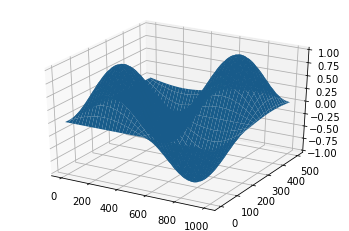

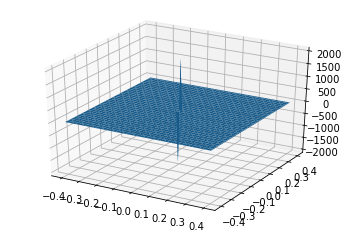

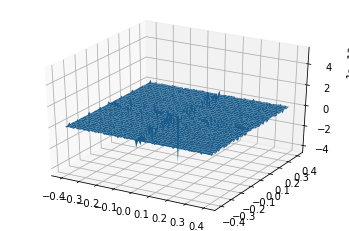

In [108]:
# Constants
f = 1
theta00 = 1
g = 1
Ns = 2
Nt = 1
pâté = g*(Ns-Nt)/(theta00*Ns*Nt)

# Initial data and Fourier series
a, b = 500, 1000
Pa, Pb = 64, 128 # samples
thetatp = np.zeros((Pa,Pb))

for i in range(Pa): # example data
    for j in range(Pb):
        thetatp[i,j] = np.sin(2*np.pi*i/Pa)*np.sin(2*np.pi*j/Pb)

fig = plt.figure()
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(np.linspace(0,b,Pb), np.linspace(0,a,Pa))
ax.plot_surface(X,Y,thetatp)
plt.show()

thetatphat = np.fft.fft2(thetatp)

fig = plt.figure()
ax = plt.axes(projection='3d')
Xf,Yf = np.meshgrid(np.linspace(-np.pi*Pb/b, np.pi*Pb/b, Pb),\
                  np.linspace(-np.pi*Pa/a, np.pi*Pa/a, Pa)) # need even Pa, Pb
ax.plot_surface(Xf,Yf,np.real(np.fft.fftshift(thetatphat)))
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xf,Yf,np.imag(np.fft.fftshift(thetatphat)))
plt.show()

<ipython-input-109-6a0fc50ee1ca>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  test[i,j] = np.exp(np.dot(wavevect[1,1],(i/Pa,j/Pb)))\


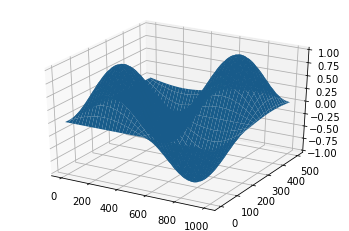

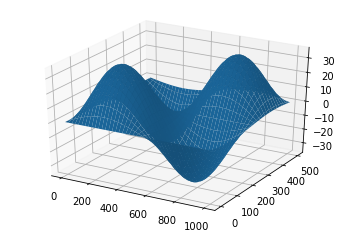

In [109]:
# Streamfunction computation
freqx = np.fft.fftfreq(Pa, a/Pa)
freqy = np.fft.fftfreq(Pb, b/Pb)
wavevect = np.array([[(2j*np.pi*m,2j*np.pi*n) for n in freqy] for m in freqx], dtype=complex)

test = np.zeros(thetatp.shape)
for i in range(Pa):
    for j in range(Pb):
        test[i,j] = np.exp(np.dot(wavevect[1,1],(i/Pa,j/Pb)))\
                  - np.exp(np.dot(wavevect[-1,1],(i/Pa,j/Pb)))\
                  - np.exp(np.dot(wavevect[1,-1],(i/Pa,j/Pb)))\
                  + np.exp(np.dot(wavevect[-1,-1],(i/Pa,j/Pb)))
test /= Pa*Pb
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,thetatp)
plt.show() # should display the initial example data

z = 0
N = Ns if z>0 else Nt
psihat = thetatphat.copy()
for m in range(Pa):
    for n in range(Pb):
        K = np.linalg.norm(wavevect[m,n])
        if K==0:
            psihat[m,n] = 0
        else:
            psihat[m,n] *= pâté/K*np.exp(-N*K/f*np.abs(z))

psi = np.fft.ifft2(psihat)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,psi)
plt.show()

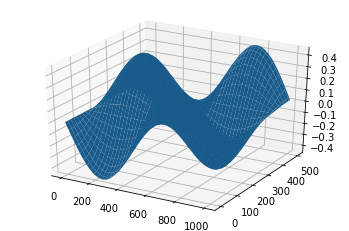

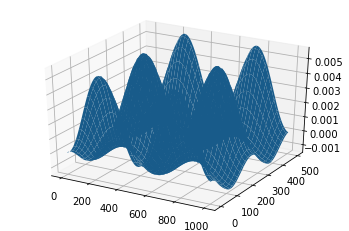

In [110]:
# Geostrophic wind and tropopause temp anomaly variation

ug = -(np.roll(psi,-1,0)-np.roll(psi,1,0))/(2*a/Pa) # centered finite differences
vg = (np.roll(psi,-1,1)-np.roll(psi,1,1))/(2*b/Pb)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,ug)
plt.show()

dxtp = (np.roll(thetatp,-1,0)-np.roll(thetatp,1,0))/(2*a/Pa)
dytp = (np.roll(thetatp,-1,1)-np.roll(thetatp,1,1))/(2*b/Pb)

dttp = -np.multiply(ug, dxtp) - np.multiply(vg, dytp)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,dttp)
plt.show()

array([0, 1, 2])